# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B/bank-additional-full.csv", sep = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [9]:
# Resample

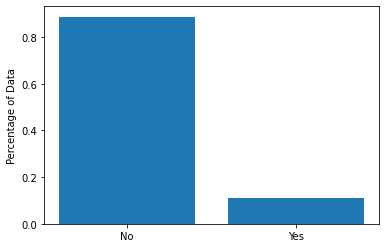

In [10]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [11]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [12]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)
# X_scaled = #???
# y_train = #???

In [13]:
X_scaled

array([[-1.05370899, -0.69511644, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [-1.05370899, -0.94491621, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [ 0.47739924,  0.07349826, -0.1593546 , ..., -0.38060429,
        -0.64821011, -0.21163819],
       ...,
       [-0.22409258,  1.59739081, -0.1593546 , ..., -0.38060429,
         1.54270966, -0.21163819],
       [-1.14940326,  0.06666136, -0.1593546 , ...,  2.62740074,
        -0.64821011, -0.21163819],
       [ 0.42946627,  0.29846044, -0.1593546 , ...,  2.62740074,
        -0.64821011, -0.21163819]])

In [14]:
y_train

,yes
0,0
1,0
2,0
3,0
4,0
...,...
51155,1
51156,1
51157,1
51158,1


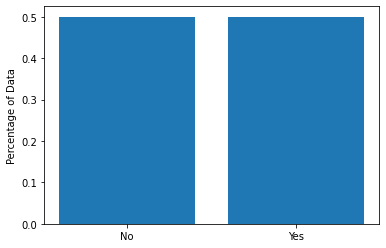

In [15]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train[y_train.yes==0])/obs,len(y_train[y_train.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [16]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.468\ngini = 0.296\nsamples = 19984\nvalue = [16367, 3617]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.126\nsamples = 11260\nvalue = [10500, 760]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.106\nsamples = 11021\nvalue = [10400, 621]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.487\nsamples = 239\nvalue = [100, 139]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.321\ngini = 0.44\nsamples = 8724\nvalue = [5867, 2857]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.492\nsamples = 6349\nvalue = [3586, 2763]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.076\nsamples = 2375\nvalue = [2281, 94]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.321\ngini = 0.416\nsamples = 31176\nvalue = [9213, 21963]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.881\ngini = 0.336\nsamples = 25673\nvalue = [5490, 20183]\nclas

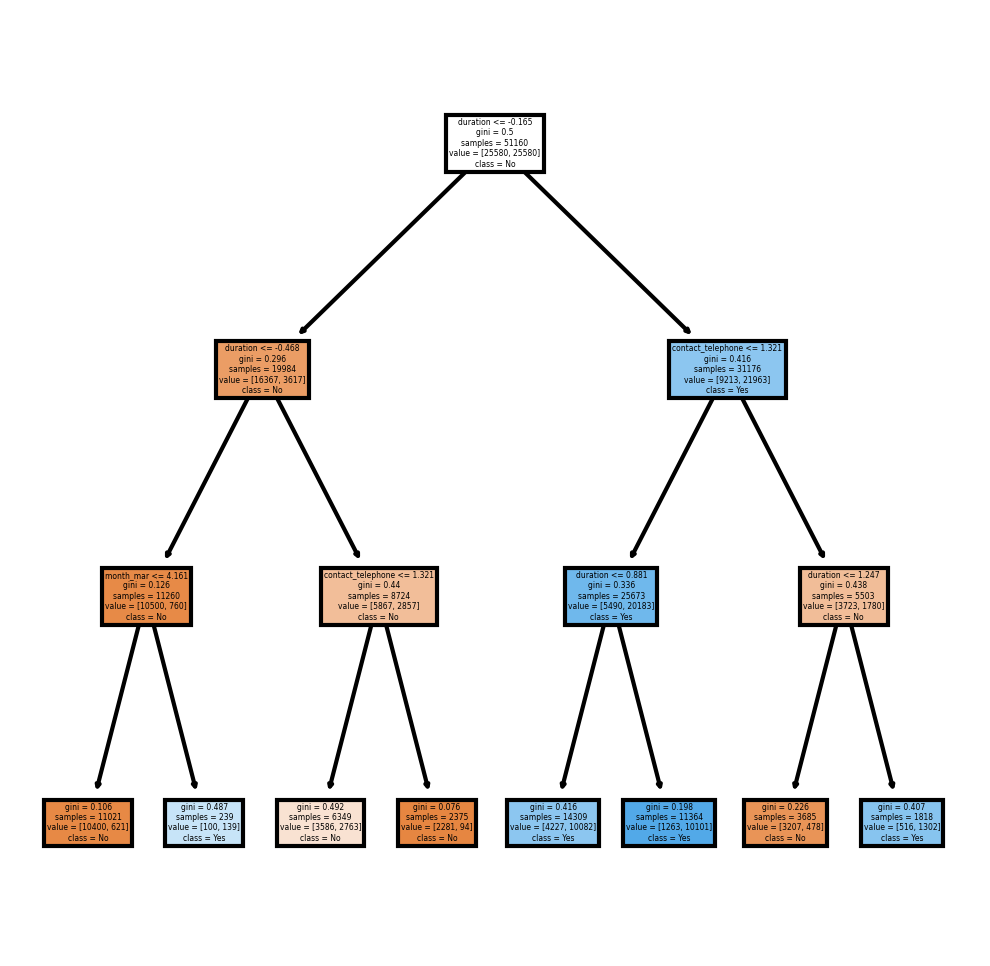

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

               
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [18]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

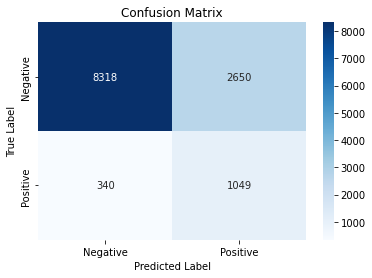

In [19]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [20]:

dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)



bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7492109735372663


In [21]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

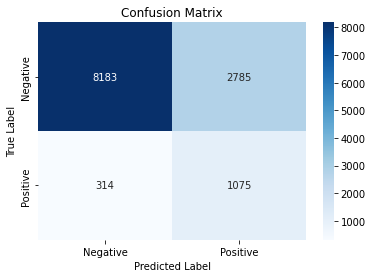

In [22]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [25]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

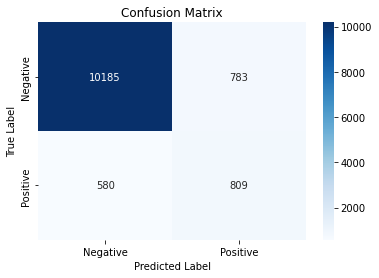

In [26]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [27]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
####IMPORT MORE BASE LEARNERS####

from mlens.ensemble import SuperLearner
from sklearn.neighbors import KNeighborsClassifier

[MLENS] backend: threading


In [29]:
### SET YOUR BASE LEARNERS(Maybe the same models but with different hyperparameters)

base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(max_depth=3),
    # KNeighborsClassifier(n_neighbors=5),
    AdaBoostClassifier(base_estimator=dtree, 
                       n_estimators=50, 
                       learning_rate=0.1),
    BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)
]
super_learner = SuperLearner(folds = 10, random_state = 42)
super_learner.add(base_estimators)

### FIT TO TRAINING DATA

super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_prediction = super_learner.predict(X_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

In [30]:
### TRAIN YOUR METALEARNER

In [31]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_prediction, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
### INTERPRET COEFFICIENTS

In [33]:
log_reg.coef_

array([[ 0.85725983, -4.07071725, -1.34118655, -3.87151284, 15.60451265]])

### From the coefficients we can see that the last model, which is the bagging model, has the highest coefficient, and that means it has the largest weight on predicting the label and it's the most important model comparing with other four models.

In [34]:
base_prediction

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [35]:
y_pred = log_reg.predict(super_learner.predict(X_test))

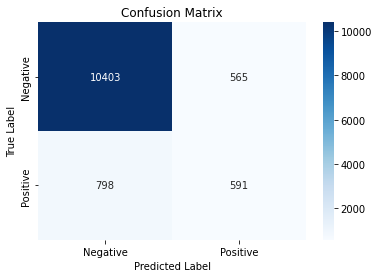

In [37]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
cm_sl = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_sl, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificity(Out of Sample)

In [38]:
cm_raw_sensitivity = cm_raw[1][1] / (cm_raw[1][0] + cm_raw[1][1])
cm_bag_sensitivity = cm_bag[1][1] / (cm_bag[1][0] + cm_bag[1][1])
cm_boost_sensitivity = cm_boost[1][1] / (cm_boost[1][0] + cm_boost[1][1])
cm_sl_sensitivity = cm_sl[1][1] / (cm_sl[1][0] + cm_sl[1][1])

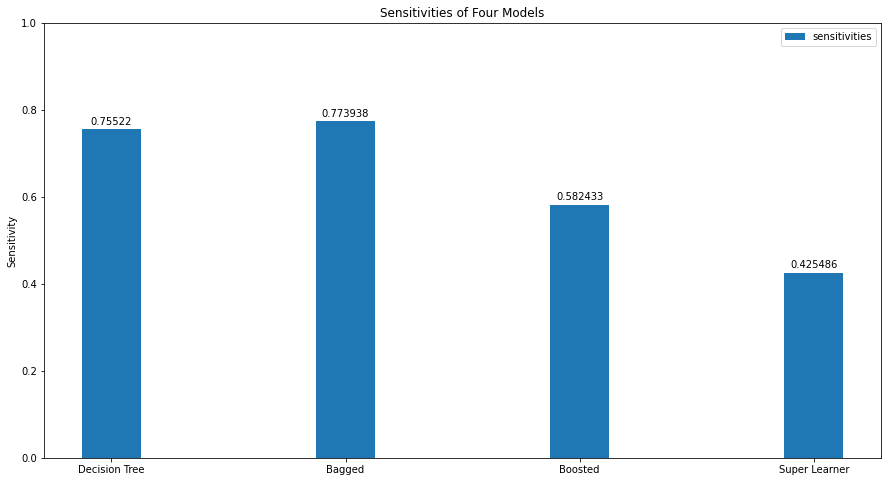

In [39]:
import matplotlib.pyplot as plt

species = ("Decision Tree", "Bagged", "Boosted", "Super Learner")
sensitivities = {
    'sensitivities': (cm_raw_sensitivity, cm_bag_sensitivity, cm_boost_sensitivity, cm_sl_sensitivity)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,8))

for attribute, measurement in sensitivities.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sensitivity')
ax.set_title('Sensitivities of Four Models')
ax.set_xticks(x, species)
ax.legend(loc='upper right')
ax.set_ylim(0, 1.0)
# plt.grid()
plt.show()
     

In [40]:
cm_raw_specificity = cm_raw[0][0] / (cm_raw[0][0] + cm_raw[0][1])
cm_bag_specificity = cm_bag[0][0] / (cm_bag[0][0] + cm_bag[0][1])
cm_boost_specificity = cm_boost[0][0] / (cm_boost[0][0] + cm_boost[0][1])
cm_sl_specificity = cm_sl[0][0] / (cm_sl[0][0] + cm_sl[0][1])

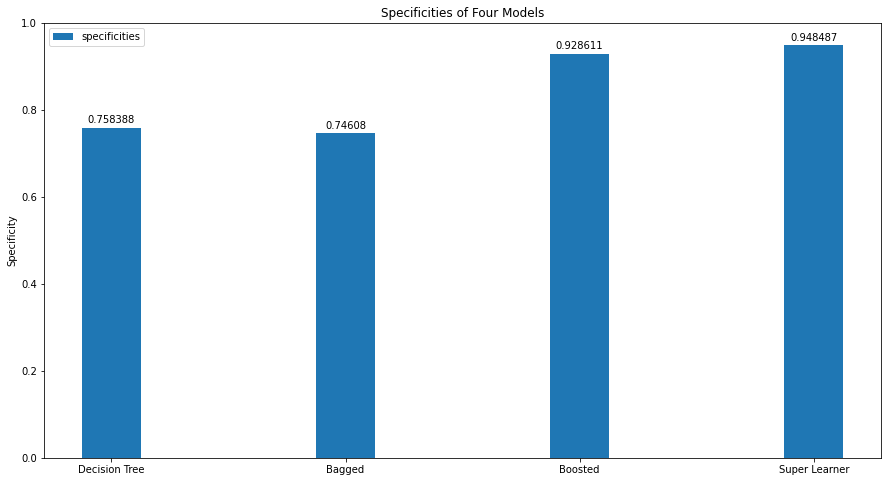

In [42]:
species = ("Decision Tree", "Bagged", "Boosted", "Super Learner")
sensitivities = {
    'specificities': (cm_raw_specificity, cm_bag_specificity, cm_boost_specificity, cm_sl_specificity)
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,8))

for attribute, measurement in sensitivities.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Specificity')
ax.set_title('Specificities of Four Models')
ax.set_xticks(x, species)
ax.legend(loc='upper left')
ax.set_ylim(0, 1.0)
# plt.grid()
plt.show()
     